<div style="color:red" >

Codigo bases

</div>

In [1]:
# %pip install arch

In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.runs import runstest_1samp
import warnings
warnings.filterwarnings("ignore")


In [6]:

# Cargar los datos
url = "https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/Caffeine.csv"
df = pd.read_csv(url)
df


,Unnamed: 0,x
0,1,0.429
1,2,0.443
2,3,0.451
3,4,0.455
4,5,0.440
...,...,...
173,174,0.393
174,175,0.394
175,176,0.389
176,177,0.391


In [ ]:
pd.date_range(start='/1/2000', periods=178, freq='D')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-06-17', '2000-06-18', '2000-06-19', '2000-06-20',
               '2000-06-21', '2000-06-22', '2000-06-23', '2000-06-24',
               '2000-06-25', '2000-06-26'],
              dtype='datetime64[ns]', length=178, freq='D')

In [ ]:
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.set_index("Fecha", inplace=True)

# Convertir la serie en un objeto de serie de tiempo
z1 = df["Concentracion"]

# Resumen de la serie
print(z1.describe())


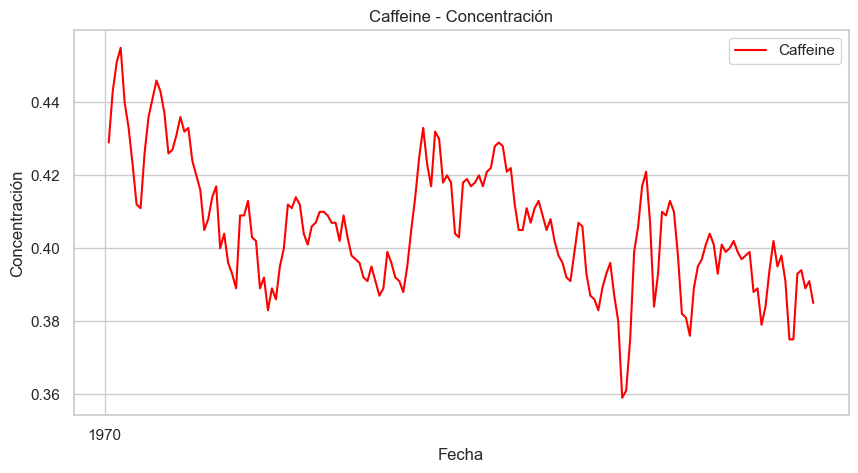

In [78]:
sns.set_theme(style="whitegrid")
# Graficar la serie original
plt.figure(figsize=(10,5))
plt.plot(z1, color="red", label="Caffeine")
plt.title("Caffeine - Concentración")
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.show()



In [58]:
import hvplot.pandas

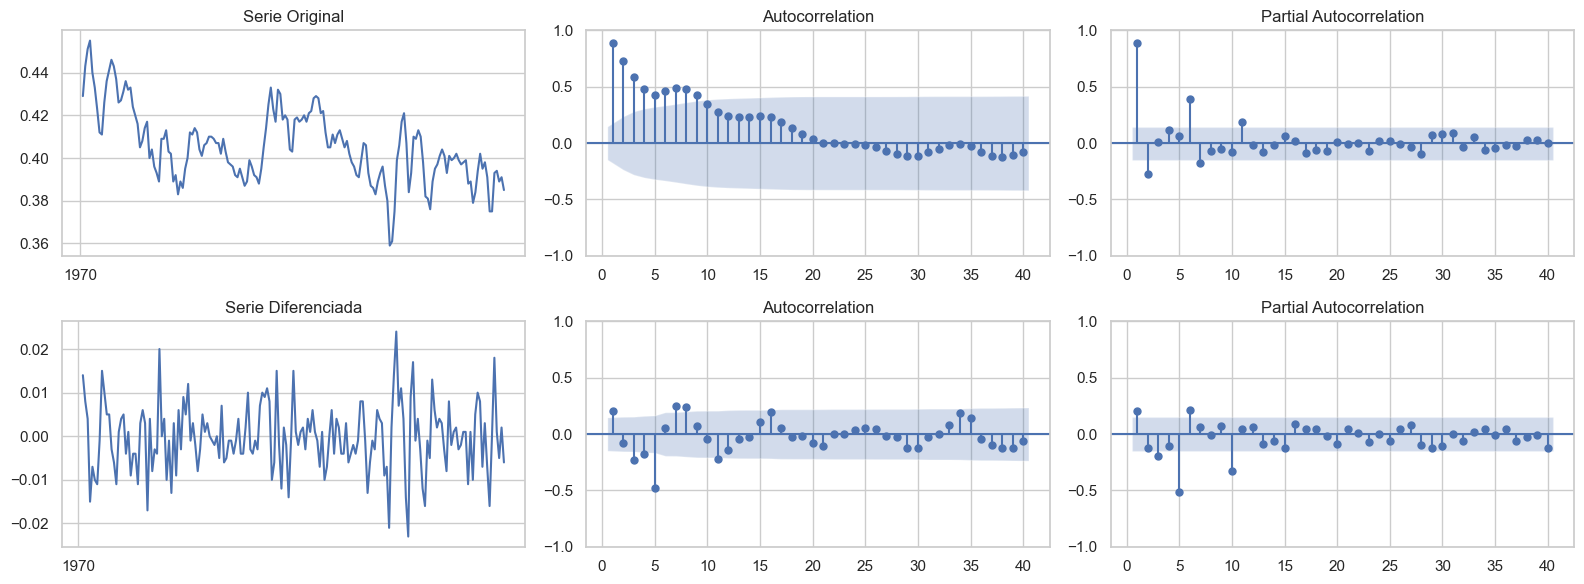

In [82]:

# Función de autocorrelación y autocorrelación parcial
fig, ax = plt.subplots(2, 3, figsize=(16, 6))
ax[0, 0].plot(z1)
ax[0, 0].set_title("Serie Original")
plot_acf(z1, ax=ax[0, 1], lags=40, zero=False)
plot_pacf(z1, ax=ax[0, 2], lags=40, zero=False)
ax[1, 0].plot(z1.diff().dropna())
ax[1, 0].set_title("Serie Diferenciada")
plot_acf(z1.diff().dropna(), ax=ax[1, 1], lags=40,  zero=False)
plot_pacf(z1.diff().dropna(), ax=ax[1, 2], lags=40, zero=False)

plt.tight_layout()
plt.show()


In [39]:
?adfuller

Signature:
adfuller(
    x,
    maxlag: 'int | None' = None,
    regression='c',
    autolag='AIC',
    store=False,
    regresults=False,
)
Docstring:
Augmented Dickey-Fuller unit root test.

The Augmented Dickey-Fuller test can be used to test for a unit root in a
univariate process in the presence of serial correlation.

Parameters
----------
x : array_like, 1d
    The data series to test.
maxlag : {None, int}
    Maximum lag which is included in test, default value of
    12*(nobs/100)^{1/4} is used when ``None``.
regression : {"c","ct","ctt","n"}
    Constant and trend order to include in regression.

    * "c" : constant only (default).
    * "ct" : constant and trend.
    * "ctt" : constant, and linear and quadratic trend.
    * "n" : no constant, no trend.

autolag : {"AIC", "BIC", "t-stat", None}
    Method to use when automatically determining the lag length among the
    values 0, 1, ..., maxlag.

    * If "AIC" (default) or "BIC", then the number of lags is chosen
      to 

In [43]:

# Pruebas de raíz unitaria
print("Prueba de Dickey-Fuller (ADF) - Serie Original:")
adf_result = adfuller(z1, autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")


Prueba de Dickey-Fuller (ADF) - Serie Original:
ADF Statistic: -1.9556223104656483
P-Value: 0.3063635089789855


In [41]:
adf_result

(-1.9913604296227319,
 0.29037405072544553,
 10,
 167,
 {'1%': -3.470126426071447,
  '5%': -2.8790075987120027,
  '10%': -2.5760826967621644},
 -1217.3388335693392)

In [7]:

print("\nPrueba de Phillips-Perron (PP) - Serie Original:")
pp_result = PhillipsPerron(z1)
print(f"PP Statistic: {pp_result.stat}")
print(f"P-Value: {pp_result.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Original:
PP Statistic: -2.7923520137701217
P-Value: 0.05937456034895007


In [8]:

# Diferenciación de la serie
z1_diff = z1.diff().dropna()

print("\nPrueba de Dickey-Fuller (ADF) - Serie Diferenciada:")
adf_result_diff = adfuller(z1_diff)
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-Value: {adf_result_diff[1]}")



Prueba de Dickey-Fuller (ADF) - Serie Diferenciada:
ADF Statistic: -5.9415385694862595
P-Value: 2.254860125149353e-07


In [9]:


print("\nPrueba de Phillips-Perron (PP) - Serie Diferenciada:")
pp_result_diff = PhillipsPerron(z1_diff)
print(f"PP Statistic: {pp_result_diff.stat}")
print(f"P-Value: {pp_result_diff.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Diferenciada:
PP Statistic: -11.70783204887231
P-Value: 1.5138953153943566e-21


In [64]:


# Evaluación de modelos ARIMA
best_model = ARIMA(z1, order=(0,1,8)).fit()

# Mostrar los coeficientes del modelo
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:          Concentracion   No. Observations:                  178
Model:                 ARIMA(0, 1, 8)   Log Likelihood                 674.862
Date:                Sat, 22 Feb 2025   AIC                          -1331.723
Time:                        22:33:34   BIC                          -1303.138
Sample:                    01-01-1970   HQIC                         -1320.130
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3427      0.078      4.374      0.000       0.189       0.496
ma.L2         -0.0334      0.095     -0.352      0.725      -0.219       0.153
ma.L3         -0.2118      0.078     -2.723      0.0

In [65]:
best_model.test_normality(method="jarquebera")

array([[3.49459133, 0.17424452, 0.11387409, 3.64959499]])

In [66]:
best_model.test_serial_correlation(method="ljungbox")

array([[[1.82924902e-03, 1.42159260e-01, 1.52491695e-01, 3.40471802e-01,
         1.74370184e+00, 2.91297786e+00, 4.86798897e+00, 5.43701587e+00,
         5.43734297e+00, 5.55051490e+00],
        [9.65885101e-01, 9.31387723e-01, 9.84867630e-01, 9.87053982e-01,
         8.83348724e-01, 8.19687143e-01, 6.76069316e-01, 7.10007671e-01,
         7.94640397e-01, 8.51508869e-01]]])

In [68]:
best_model.test_serial_correlation(method="ljungbox", lags=[6, 20, 30])

array([[[ 2.91297786, 14.29402384, 19.93974477],
        [ 0.81968714,  0.81528079,  0.91810104]]])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

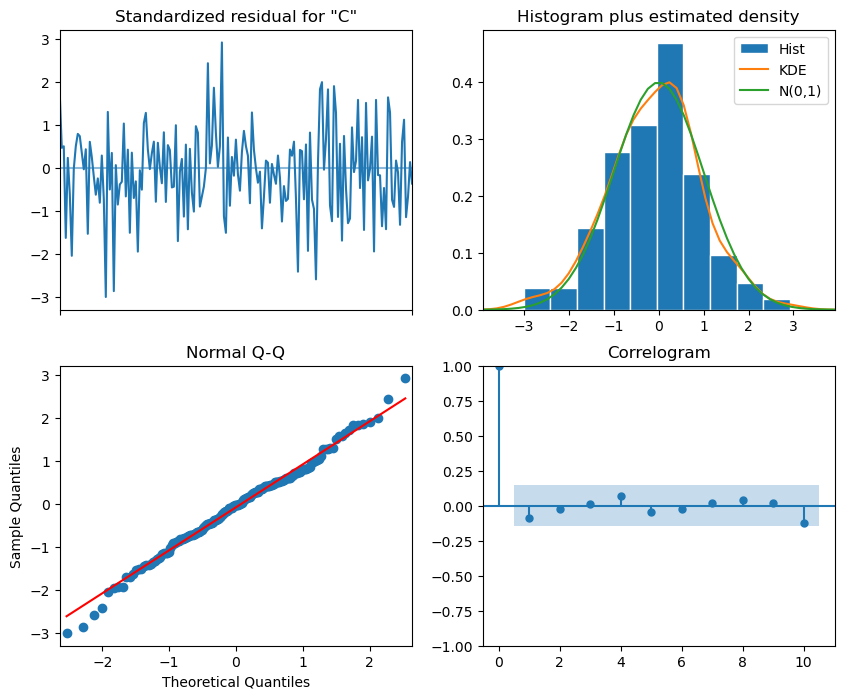

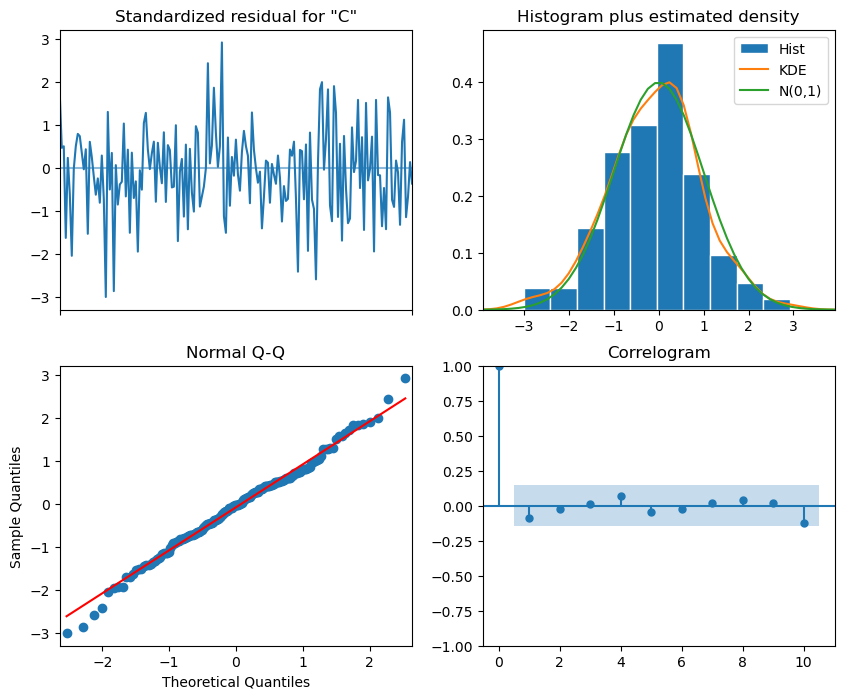

In [29]:
best_model.plot_diagnostics(figsize=(10, 8))

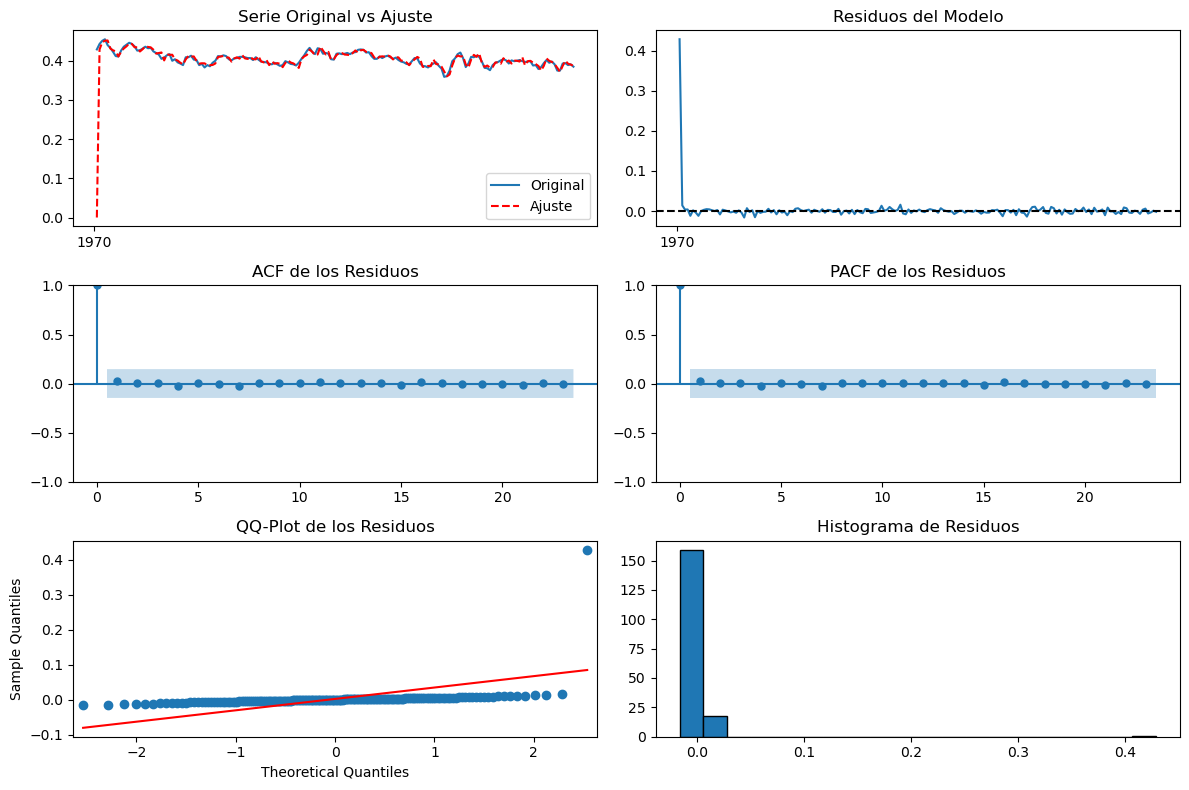

In [28]:


# Diagnóstico del modelo
residuals = best_model.resid

# Graficar residuos
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
ax[0, 0].plot(z1, label="Original")
ax[0, 0].plot(best_model.fittedvalues, color="red", linestyle="dashed", label="Ajuste")
ax[0, 0].set_title("Serie Original vs Ajuste")
ax[0, 0].legend()

ax[0, 1].plot(residuals, label="Residuos")
ax[0, 1].set_title("Residuos del Modelo")
ax[0, 1].axhline(0, color="black", linestyle="dashed")

plot_acf(residuals, ax=ax[1, 0])
ax[1, 0].set_title("ACF de los Residuos")

plot_pacf(residuals, ax=ax[1, 1])
ax[1, 1].set_title("PACF de los Residuos")

qqplot(residuals, line='s', ax=ax[2, 0])
ax[2, 0].set_title("QQ-Plot de los Residuos")

ax[2, 1].hist(residuals, bins=20, edgecolor="black")
ax[2, 1].set_title("Histograma de Residuos")

plt.tight_layout()
plt.show()


In [27]:
for i in range(1, 15):
    # Prueba de Ljung-Box
    p_value = acorr_ljungbox(residuals, lags=[i], return_df=True)
    print(f"P-Value para {i} rezagos: {p_value}")

P-Value para 1 rezagos:     lb_stat  lb_pvalue
1  0.166712   0.683051
P-Value para 2 rezagos:     lb_stat  lb_pvalue
2  0.180907   0.913517
P-Value para 3 rezagos:     lb_stat  lb_pvalue
3  0.198264   0.977869
P-Value para 4 rezagos:     lb_stat  lb_pvalue
4  0.307456   0.989328
P-Value para 5 rezagos:     lb_stat  lb_pvalue
5  0.309301   0.997464
P-Value para 6 rezagos:     lb_stat  lb_pvalue
6  0.323627   0.999374
P-Value para 7 rezagos:     lb_stat  lb_pvalue
7  0.450927   0.999607
P-Value para 8 rezagos:     lb_stat  lb_pvalue
8  0.451339    0.99991
P-Value para 9 rezagos:     lb_stat  lb_pvalue
9  0.463308   0.999978
P-Value para 10 rezagos:      lb_stat  lb_pvalue
10  0.474586   0.999995
P-Value para 11 rezagos:      lb_stat  lb_pvalue
11  0.498811   0.999999
P-Value para 12 rezagos:      lb_stat  lb_pvalue
12  0.503784        1.0
P-Value para 13 rezagos:      lb_stat  lb_pvalue
13  0.504046        1.0
P-Value para 14 rezagos:      lb_stat  lb_pvalue
14  0.505672        1.0


In [19]:

# Prueba de Ljung-Box (Autocorrelación en residuos)
lb_test = acorr_ljungbox(residuals, lags=[2], return_df=True)
print("\nPrueba de Ljung-Box para Autocorrelación de Residuos:")
print(lb_test)



Prueba de Ljung-Box para Autocorrelación de Residuos:
    lb_stat  lb_pvalue
2  0.180907   0.913517


In [13]:

# Prueba de Normalidad de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuals)
print("\nPrueba de Normalidad de Jarque-Bera:")
print(f"Estadístico: {jb_stat}, P-valor: {jb_pvalue}")



Prueba de Normalidad de Jarque-Bera:
Estadístico: 202144.25018524352, P-valor: 0.0


In [14]:


# Prueba de Aleatoriedad (Runs Test)
runs_stat, runs_pvalue = runstest_1samp(residuals, correction=True)
print("\nPrueba de Aleatoriedad (Runs Test):")
print(f"Estadístico: {runs_stat}, P-valor: {runs_pvalue}")



Prueba de Aleatoriedad (Runs Test):
Estadístico: 0.03164388575243973, P-valor: 0.9747560451293282


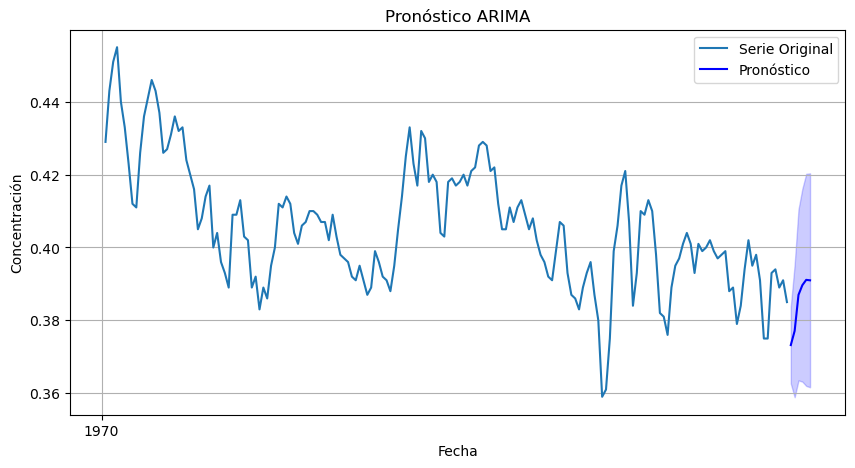

In [15]:

# Pronóstico del modelo
forecast_horizon = 6
forecast_result = best_model.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Graficar el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(z1, label="Serie Original")
plt.plot(forecast_mean, color="blue", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="blue", alpha=0.2)
plt.title("Pronóstico ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.show()
